## LSTM- 2

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten

from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D
import matplotlib.dates as mdates


In [2]:
import tensorflow as tf

In [84]:
data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv")
data

,date,NDVI_p1
0,"Jan 4, 2021",0.659753
1,"Jan 9, 2021",0.525199
2,"Jan 14, 2021",0.010833
3,"Jan 19, 2021",0.646873
4,"Feb 3, 2021",0.098306
5,"Feb 8, 2021",0.747664
6,"Feb 18, 2021",0.696852
7,"Feb 23, 2021",0.806154
8,"Feb 28, 2021",0.774941
9,"Mar 5, 2021",0.818840


            date   NDVI_p1
0    Jan 4, 2021  0.659753
1    Jan 9, 2021  0.525199
2   Jan 14, 2021  0.010833
3   Jan 19, 2021  0.646873
4    Feb 3, 2021  0.098306
5    Feb 8, 2021  0.747664
6   Feb 18, 2021  0.696852
7   Feb 23, 2021  0.806154
8   Feb 28, 2021  0.774941
9    Mar 5, 2021  0.818840
10  Mar 10, 2021  0.701968
11  Mar 15, 2021  0.596987
12  Mar 20, 2021  0.646613
13  Mar 25, 2021  0.472071
14  Mar 30, 2021  0.339439
15   Apr 4, 2021  0.601445
16   Apr 9, 2021  0.397024
17  Apr 19, 2021  0.219185
18  Apr 24, 2021  0.274989
19  Apr 29, 2021  0.209490
20   May 4, 2021  0.160426
21   May 9, 2021  0.219486
22  May 14, 2021  0.282939
23  May 24, 2021  0.417111
24  May 29, 2021  0.272358
25   Jun 3, 2021  0.341249
26   Jun 8, 2021  0.316335
27  Jun 23, 2021  0.485298
28  Jun 28, 2021  0.370461
29   Jul 8, 2021  0.338414
30  Aug 12, 2021  0.364100
31  Aug 17, 2021  0.487611
32  Aug 27, 2021  0.580933
33  Sep 16, 2021  0.606453
34  Sep 26, 2021  0.001846
35   Oct 6, 2021  0.206433
3

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

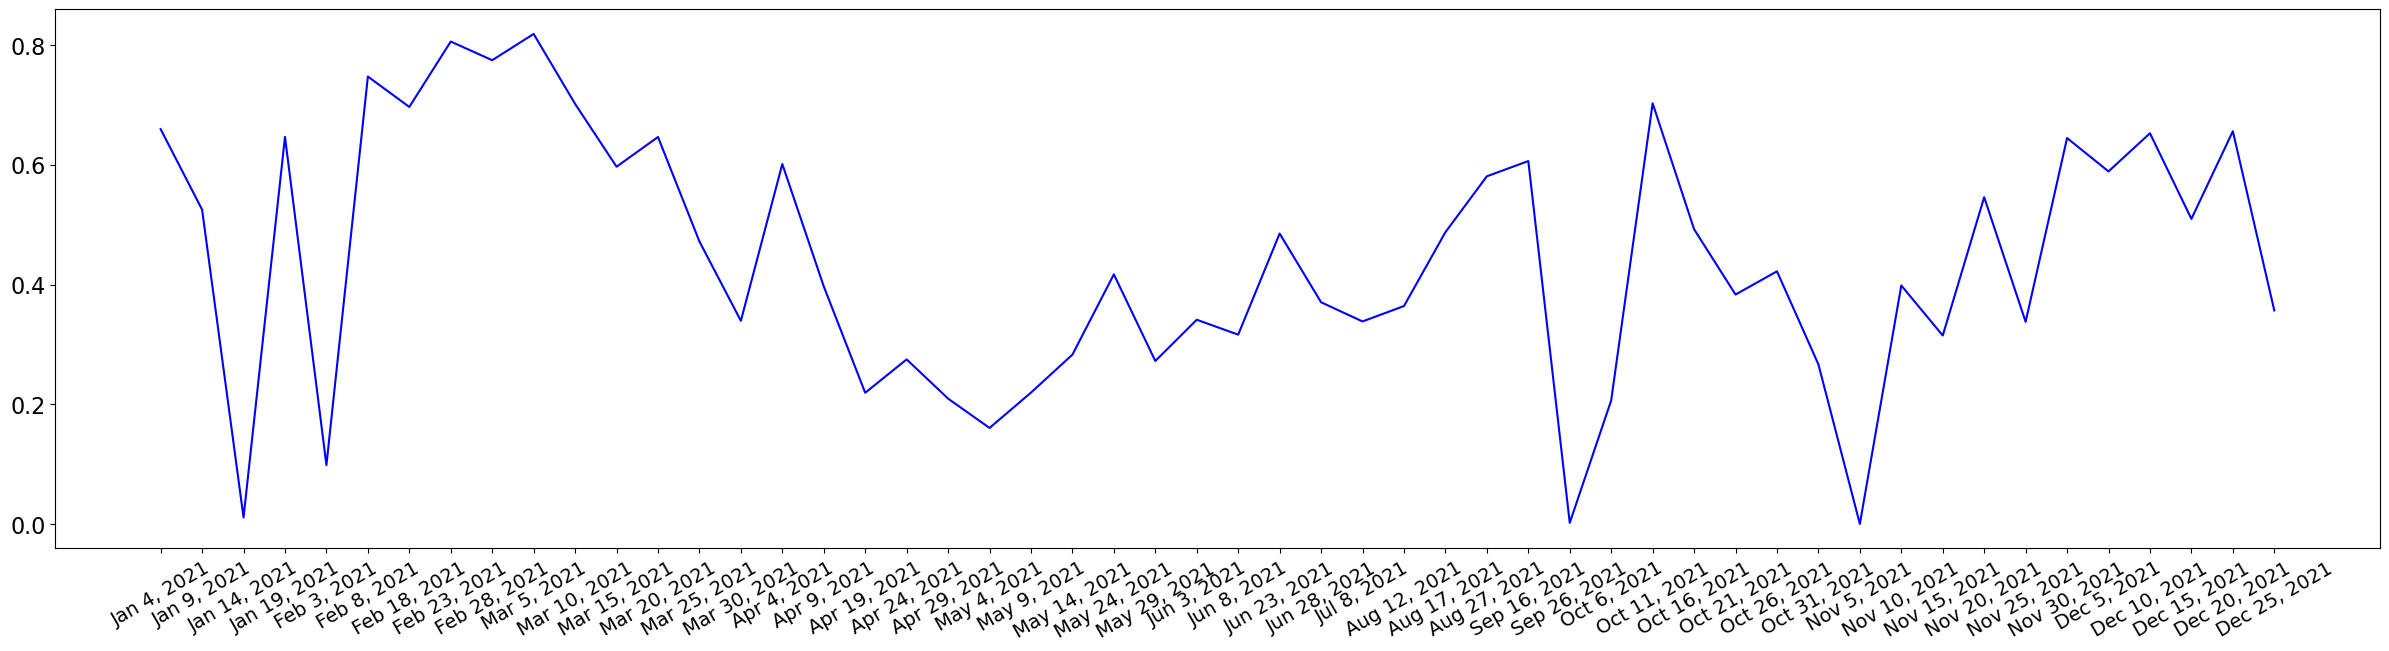

In [85]:
#loading of the data

data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv")
print (data)
#values put into different array
x = data['date'].values   #date
y = data['NDVI_p1'].values   #NDVI values

plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.yticks(fontsize=16)
plt.xticks(rotation =30,fontsize =14)

In [149]:
print(np.__version__)
print(tf.__version__)

1.23.1
2.13.0


array([[0.659753  ],
       [0.525199  ],
       [0.0108335 ],
       [0.646873  ],
       [0.098306  ],
       [0.747664  ],
       [0.696852  ],
       [0.806154  ],
       [0.774941  ],
       [0.81884   ],
       [0.701968  ],
       [0.596987  ],
       [0.646613  ],
       [0.472071  ],
       [0.339439  ],
       [0.601445  ],
       [0.397024  ],
       [0.219185  ],
       [0.2749885 ],
       [0.20949   ],
       [0.1604265 ],
       [0.219486  ],
       [0.282939  ],
       [0.417111  ],
       [0.272358  ],
       [0.341249  ],
       [0.316335  ],
       [0.485298  ],
       [0.370461  ],
       [0.338414  ],
       [0.3641    ],
       [0.487611  ],
       [0.580933  ],
       [0.6064535 ],
       [0.00184615],
       [0.206433  ],
       [0.7029555 ],
       [0.492591  ],
       [0.383347  ],
       [0.422142  ],
       [0.266667  ],
       [0.        ],
       [0.398508  ],
       [0.314923  ],
       [0.545999  ],
       [0.337808  ],
       [0.644876  ],
       [0.589

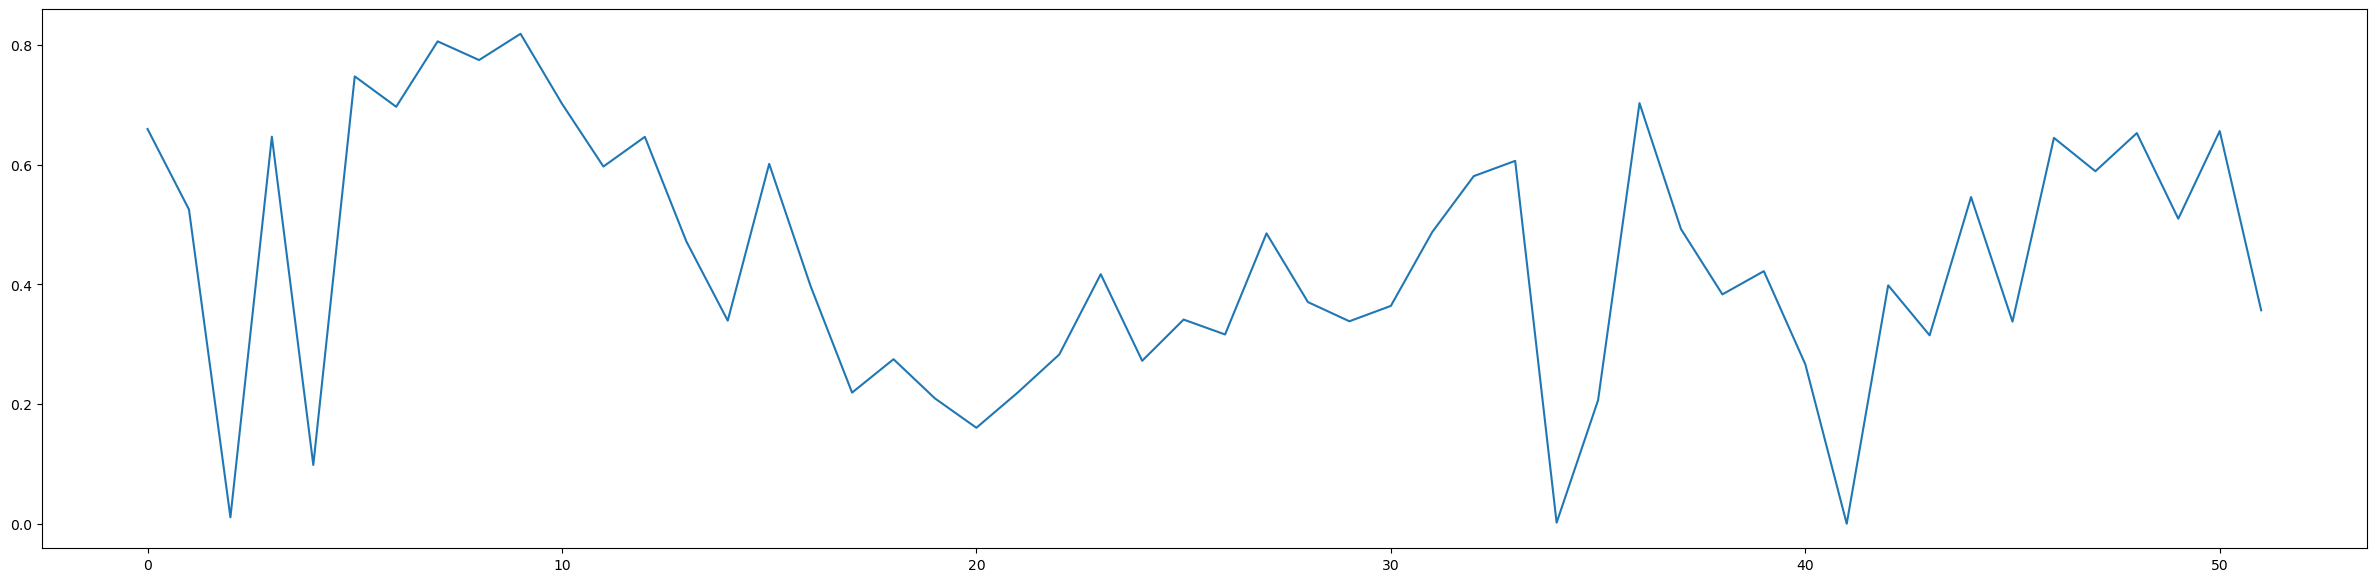

In [86]:
# load the dataset
dataframe = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv', usecols=[1])
plt.figure(figsize=(30,7))
plt.plot(dataframe)

#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

dataset

In [57]:
# plt.figure(figsize=(30,7))
# interval = np.arange(50)
# plt.plot(x, y, 'b', label = 'No smoothing')
# plt.xticks(rotation =30)

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p1'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)


[[0.80571662]
 [0.64139392]
 [0.0132303 ]
 [0.78998705]
 [0.1200552 ]
 [0.91307704]
 [0.8510234 ]
 [0.98450735]
 [0.94638879]
 [1.        ]
 [0.85727126]
 [0.72906429]
 [0.78966953]
 [0.57651189]
 [0.41453642]
 [0.73450857]
 [0.48486151]
 [0.26767745]
 [0.3358269 ]
 [0.25583753]
 [0.19591923]
 [0.26804504]
 [0.34553637]
 [0.50939256]
 [0.33261443]
 [0.41674686]
 [0.38632089]
 [0.59266523]
 [0.45242172]
 [0.41328465]
 [0.44465341]
 [0.59548996]
 [0.7094585 ]
 [0.74062515]
 [0.00225459]
 [0.2521042 ]
 [0.85847724]
 [0.60157174]
 [0.46815861]
 [0.51553661]
 [0.32566435]
 [0.        ]
 [0.48667383]
 [0.3845965 ]
 [0.66679571]
 [0.41254458]
 [0.78754824]
 [0.71946778]
 [0.79732548]
 [0.62256851]
 [0.80145572]
 [0.4356944 ]]


In [88]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [89]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 2s 7ms/step - loss: 0.2930
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2782
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2649
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2507
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2385
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.2255
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2125
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1996
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1865
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1732
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1601
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1473
Epoch 13/100
2/2 [==============================] - 0s 6m

In [90]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 24ms/step


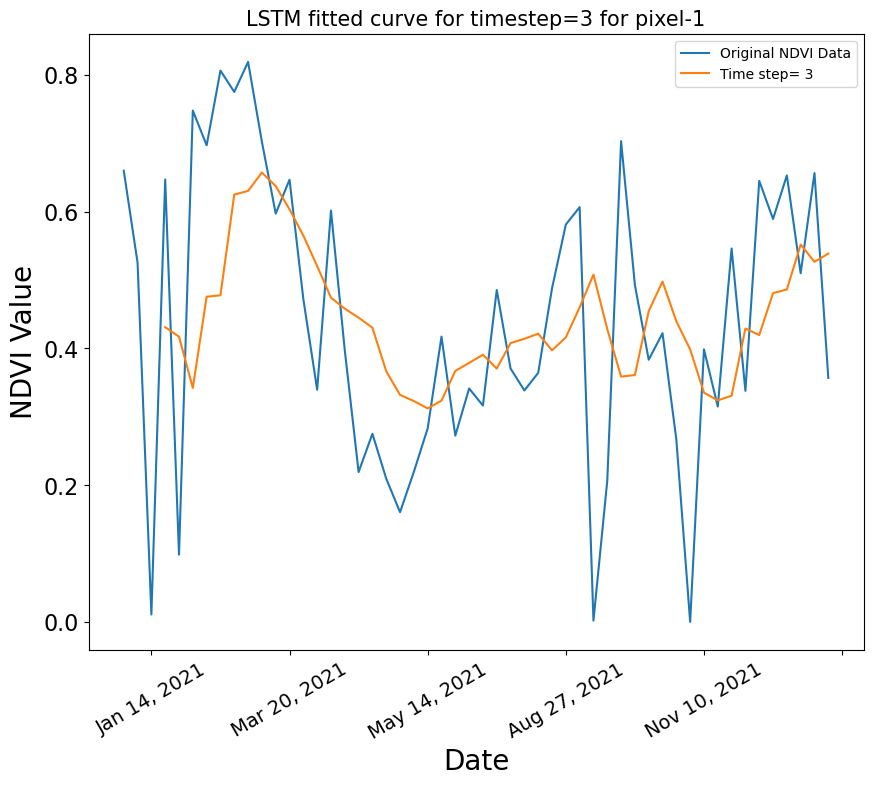

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)

# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')  # Added a closing parenthesis here

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred]), label='Time step= 3')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('LSTM fitted curve for timestep=3 for pixel-1',fontsize=15)
plt.legend(fontsize=10)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/lstm_p3_ts=1.png')
# Show the plot
plt.show()



## reverse sequence

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

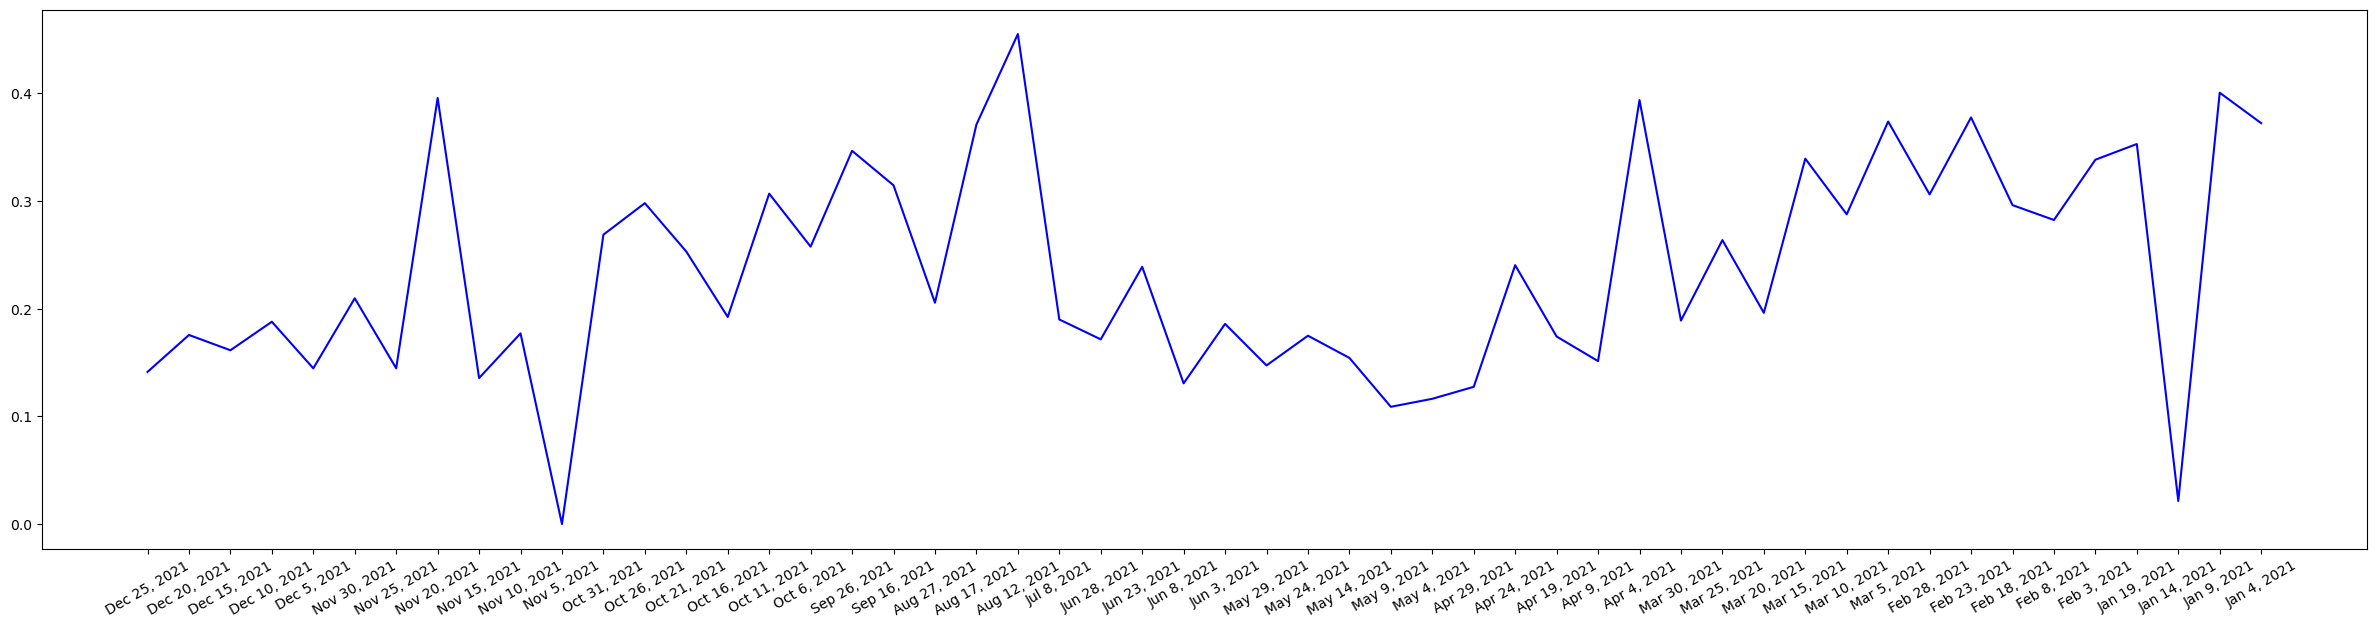

In [280]:
#loading of the data

data=pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv')

#values put into different array
x = data['date'].values   #date
y = data['NDVI_p3_reverse'].values   #NDVI values

plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.xticks(rotation =30)

array([[0.141279 ],
       [0.1755725],
       [0.161378 ],
       [0.187856 ],
       [0.144573 ],
       [0.209634 ],
       [0.14463  ],
       [0.395652 ],
       [0.135563 ],
       [0.177042 ],
       [0.       ],
       [0.268727 ],
       [0.297978 ],
       [0.253029 ],
       [0.192275 ],
       [0.306802 ],
       [0.257584 ],
       [0.346583 ],
       [0.314572 ],
       [0.205543 ],
       [0.370912 ],
       [0.455045 ],
       [0.189967 ],
       [0.17151  ],
       [0.23888  ],
       [0.130649 ],
       [0.185864 ],
       [0.147293 ],
       [0.174878 ],
       [0.154281 ],
       [0.108869 ],
       [0.1163   ],
       [0.12741  ],
       [0.240421 ],
       [0.174136 ],
       [0.151285 ],
       [0.393747 ],
       [0.18894  ],
       [0.263677 ],
       [0.19615  ],
       [0.339286 ],
       [0.287617 ],
       [0.37381  ],
       [0.306111 ],
       [0.377588 ],
       [0.296159 ],
       [0.282356 ],
       [0.338322 ],
       [0.352909 ],
       [0.0213904],


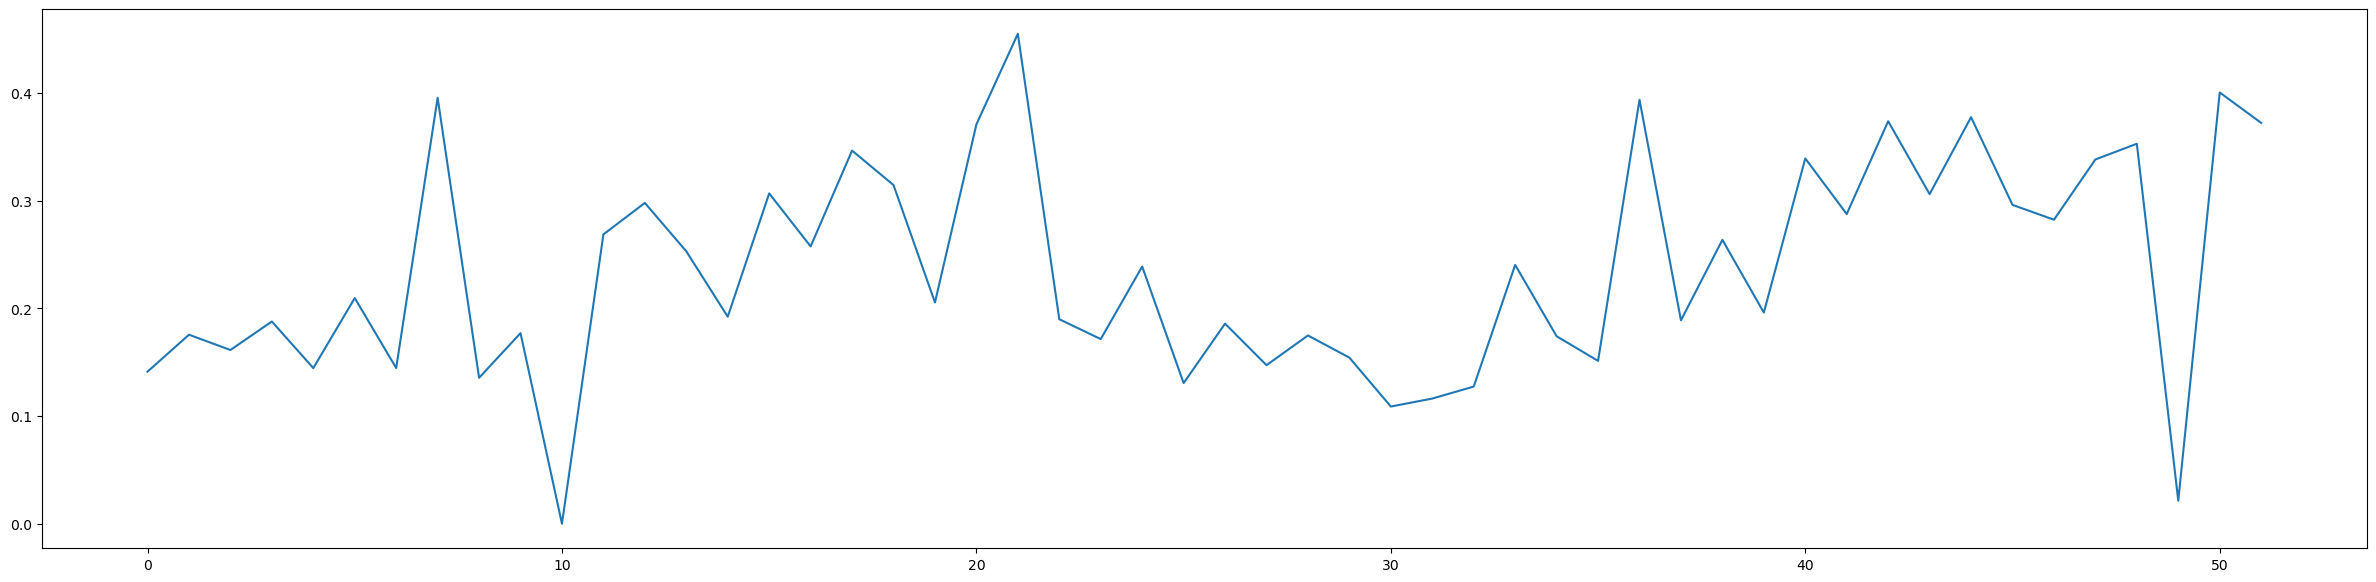

In [282]:
# load the dataset
dataframe = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv', usecols=[1])
plt.figure(figsize=(30,7))
plt.plot(dataframe)

#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

dataset

In [284]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p3_reverse'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)

[[0.31047259]
 [0.38583547]
 [0.35464185]
 [0.4128295 ]
 [0.31771144]
 [0.4606885 ]
 [0.3178367 ]
 [0.86947884]
 [0.2979112 ]
 [0.38906482]
 [0.        ]
 [0.59055039]
 [0.65483194]
 [0.5560527 ]
 [0.42254063]
 [0.67422343]
 [0.5660627 ]
 [0.76164555]
 [0.69129866]
 [0.45169818]
 [0.81511059]
 [1.        ]
 [0.4174686 ]
 [0.37690778]
 [0.52495907]
 [0.28711226]
 [0.40845191]
 [0.32368887]
 [0.38430924]
 [0.33904559]
 [0.23924887]
 [0.25557912]
 [0.27999429]
 [0.52834555]
 [0.38267864]
 [0.33246162]
 [0.86529244]
 [0.41521168]
 [0.57945258]
 [0.43105627]
 [0.74560977]
 [0.63206276]
 [0.82147919]
 [0.6727049 ]
 [0.82978167]
 [0.65083453]
 [0.62050127]
 [0.7434913 ]
 [0.77554747]
 [0.04700722]
 [0.88021185]
 [0.81813667]]


In [285]:
# Define the number of time steps to consider in each input sequence
n_steps = 3

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [286]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 0.3542
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3398
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3252
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3112
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2974
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2844
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2710
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2586
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2465
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2347
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2224
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2110
Epoch 13/100
2/2 [==============================] - 0s 6ms/s

In [287]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred_2 = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 34ms/step


In [25]:
(NDVI_p2_reversed)

NameError: name 'NDVI_p2_reversed' is not defined

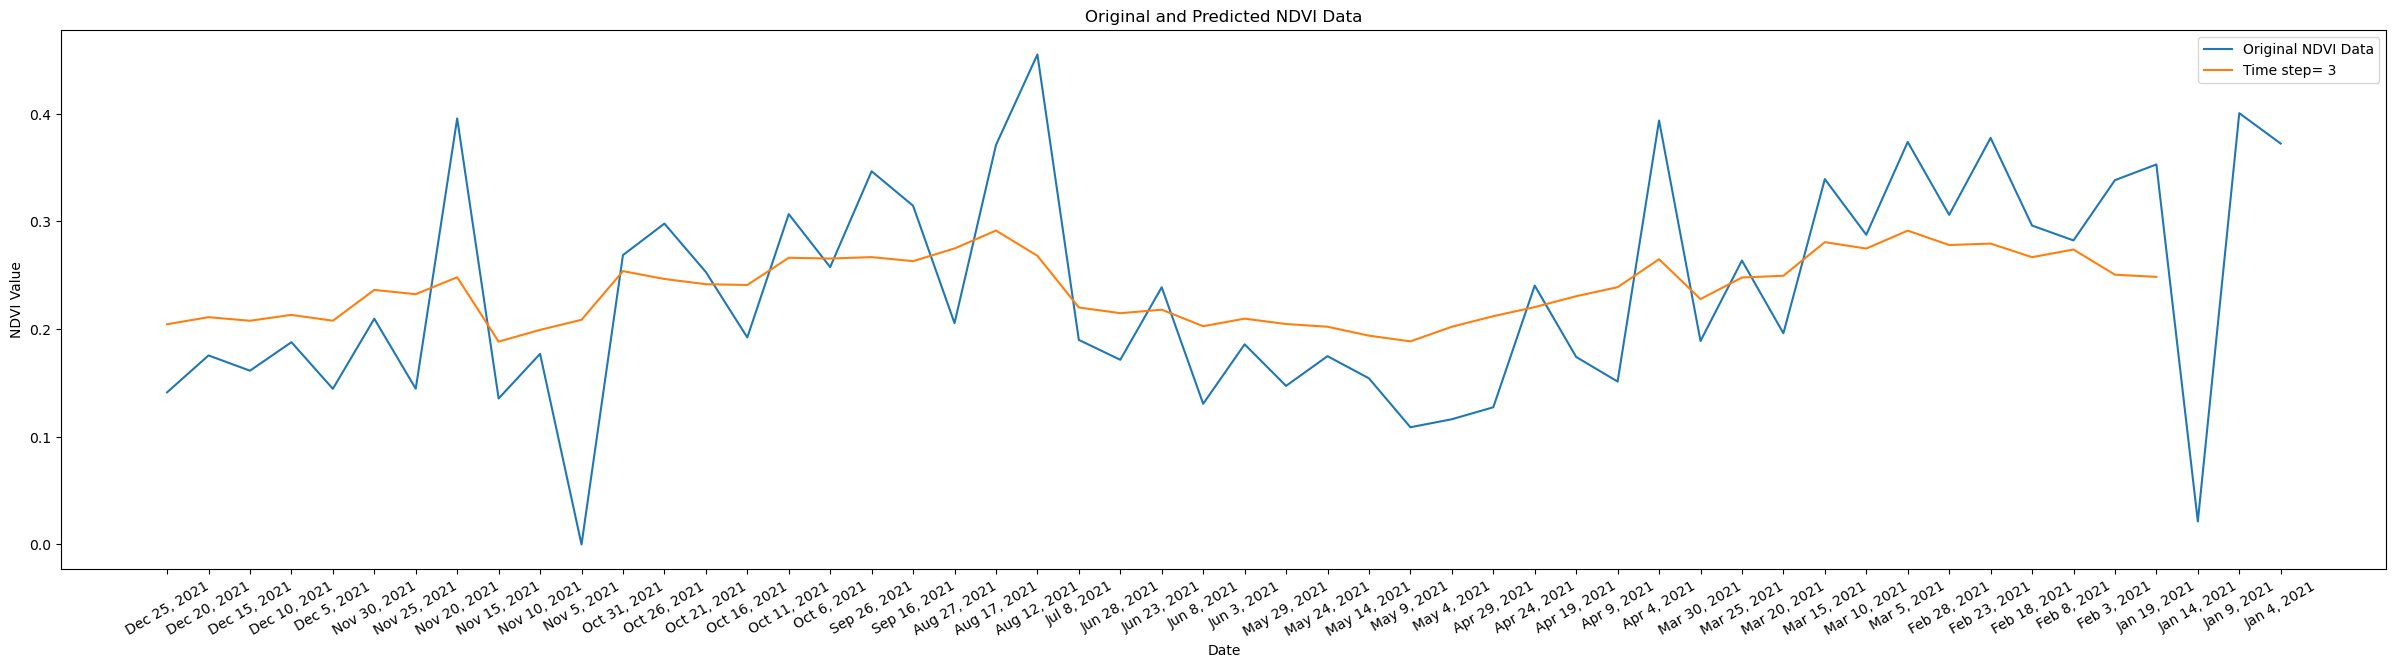

In [289]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 7))
plt.xticks(rotation=30)

# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p3_reverse'], label='Original NDVI Data') 

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space,y_pred_2][::-1]), label='Time step= 3')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()



## average 


In [247]:
a=[1,2,3]
a[::-1]

[3, 2, 1]

In [290]:
a3 =np.concatenate([empty_space, y_pred])
b3= np.concatenate([empty_space,y_pred_2])
b3 = b3[::-1]
# Calculate the average of curves 'a' and 'b'
average_curve = (a3 + b3) / 2



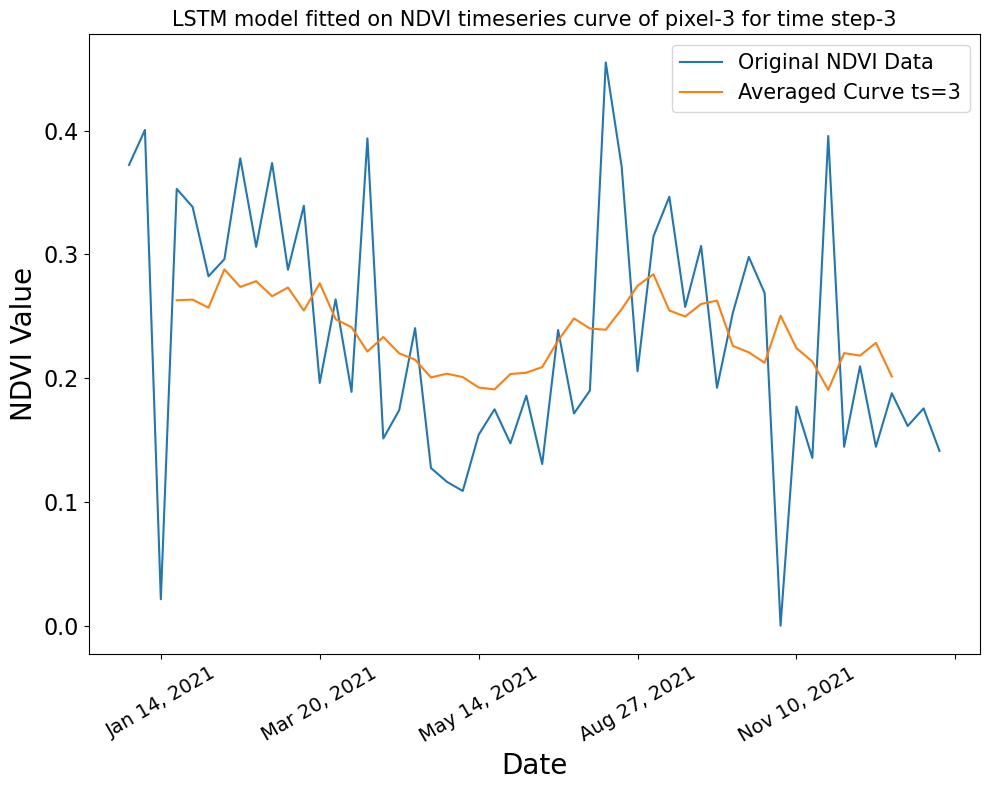

In [292]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))



reversed_time = data['date'][::-1]
reversed_average = average_curve  # Reverse the average curve as well
# Plot the original NDVI data
plt.plot(reversed_time, data['NDVI_p3_reverse'][::-1],label='Original NDVI Data')




# Plot the averaged curve over the original data
plt.plot(reversed_time, reversed_average, label='Averaged Curve ts=3')


plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)

plt.title('LSTM model fitted on NDVI timeseries curve of pixel-3 for time step-3',fontsize=15)
plt.tight_layout()
plt.legend(fontsize=15)

plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/pt3_average curve ts=3.png') 
# Show the plot
plt.show()

## Timestep=5

### forward direction 

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p1'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)


[[0.80571662]
 [0.64139392]
 [0.0132303 ]
 [0.78998705]
 [0.1200552 ]
 [0.91307704]
 [0.8510234 ]
 [0.98450735]
 [0.94638879]
 [1.        ]
 [0.85727126]
 [0.72906429]
 [0.78966953]
 [0.57651189]
 [0.41453642]
 [0.73450857]
 [0.48486151]
 [0.26767745]
 [0.3358269 ]
 [0.25583753]
 [0.19591923]
 [0.26804504]
 [0.34553637]
 [0.50939256]
 [0.33261443]
 [0.41674686]
 [0.38632089]
 [0.59266523]
 [0.45242172]
 [0.41328465]
 [0.44465341]
 [0.59548996]
 [0.7094585 ]
 [0.74062515]
 [0.00225459]
 [0.2521042 ]
 [0.85847724]
 [0.60157174]
 [0.46815861]
 [0.51553661]
 [0.32566435]
 [0.        ]
 [0.48667383]
 [0.3845965 ]
 [0.66679571]
 [0.41254458]
 [0.78754824]
 [0.71946778]
 [0.79732548]
 [0.62256851]
 [0.80145572]
 [0.4356944 ]]


In [93]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [94]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 2s 6ms/step - loss: 0.3411
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3218
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.3044
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2862
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2705
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2543
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2391
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2243
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2084
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.1934
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1781
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1630
Epoch 13/100
2/2 [==============================] - 0s 13

In [95]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred_p15forward = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 25ms/step


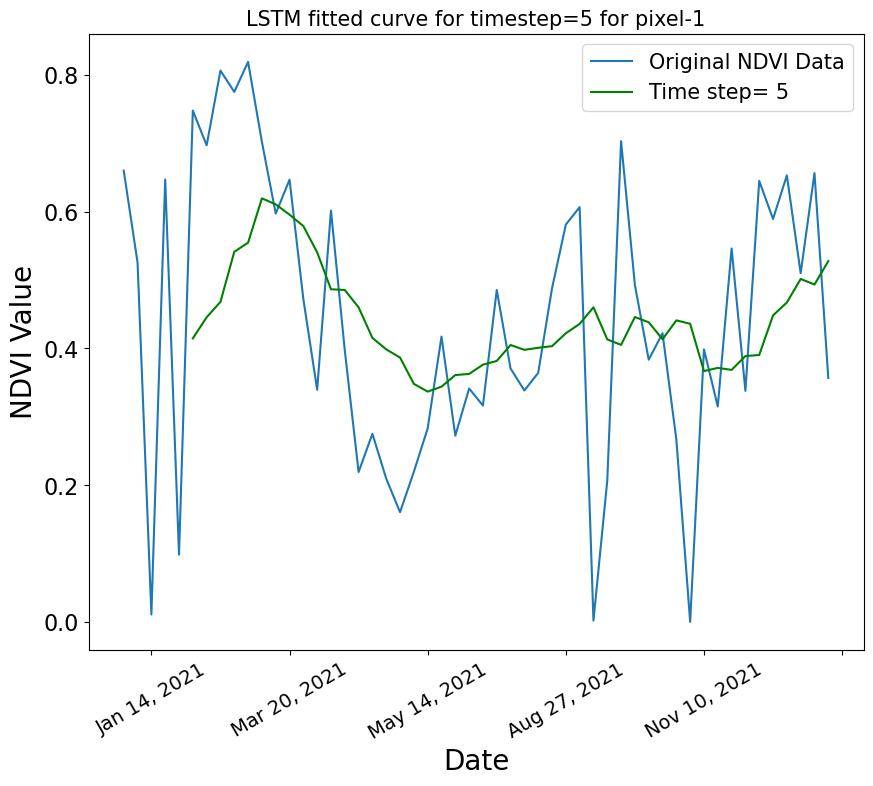

In [96]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)

# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')  # Added a closing parenthesis here

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred_p15forward ]), 'green',label='Time step= 5')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title

plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('LSTM fitted curve for timestep=5 for pixel-1',fontsize=15)
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/lstm_p1_ts=5.png')
# Show the plot
plt.show()



In [97]:
u=np.concatenate([empty_space, y_pred])
v=np.concatenate([empty_space, y_pred_p15forward])

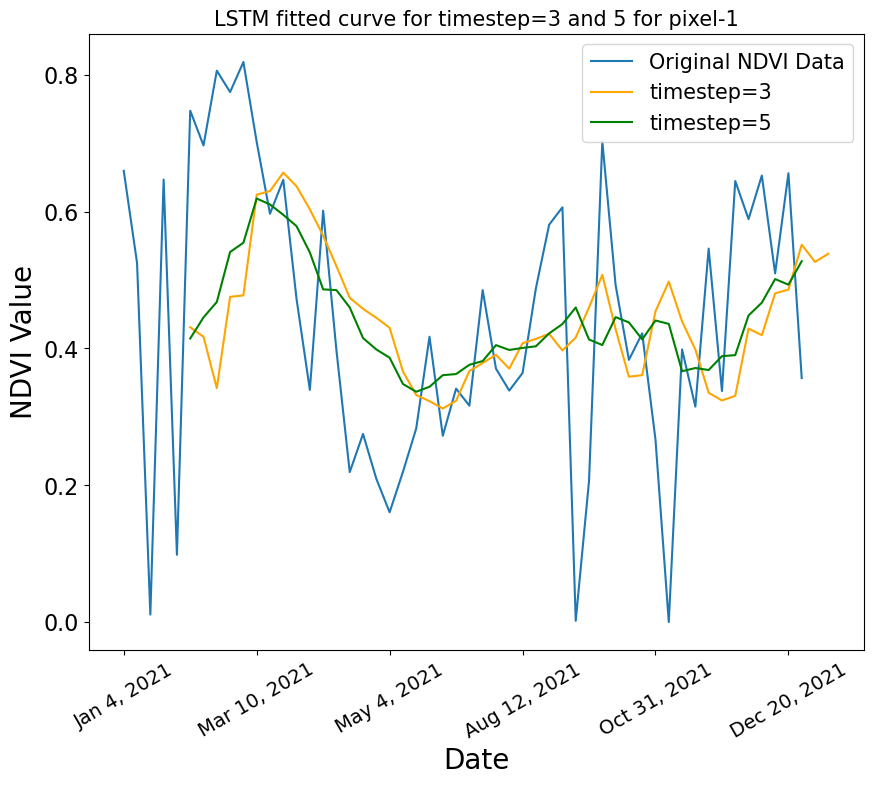

In [98]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p1'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
plt.plot(u ,"orange", label="timestep=3")
plt.plot(v ,"green", label="timestep=5")

plt.xlabel('Date', fontsize=20)
plt.ylabel('NDVI Value', fontsize=20)
plt.title('LSTM fitted curve for timestep=3 and 5 for pixel-1', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/lstm_p1_ts=5 and 3.png')
# Show the plot
plt.show()




## reverse order 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

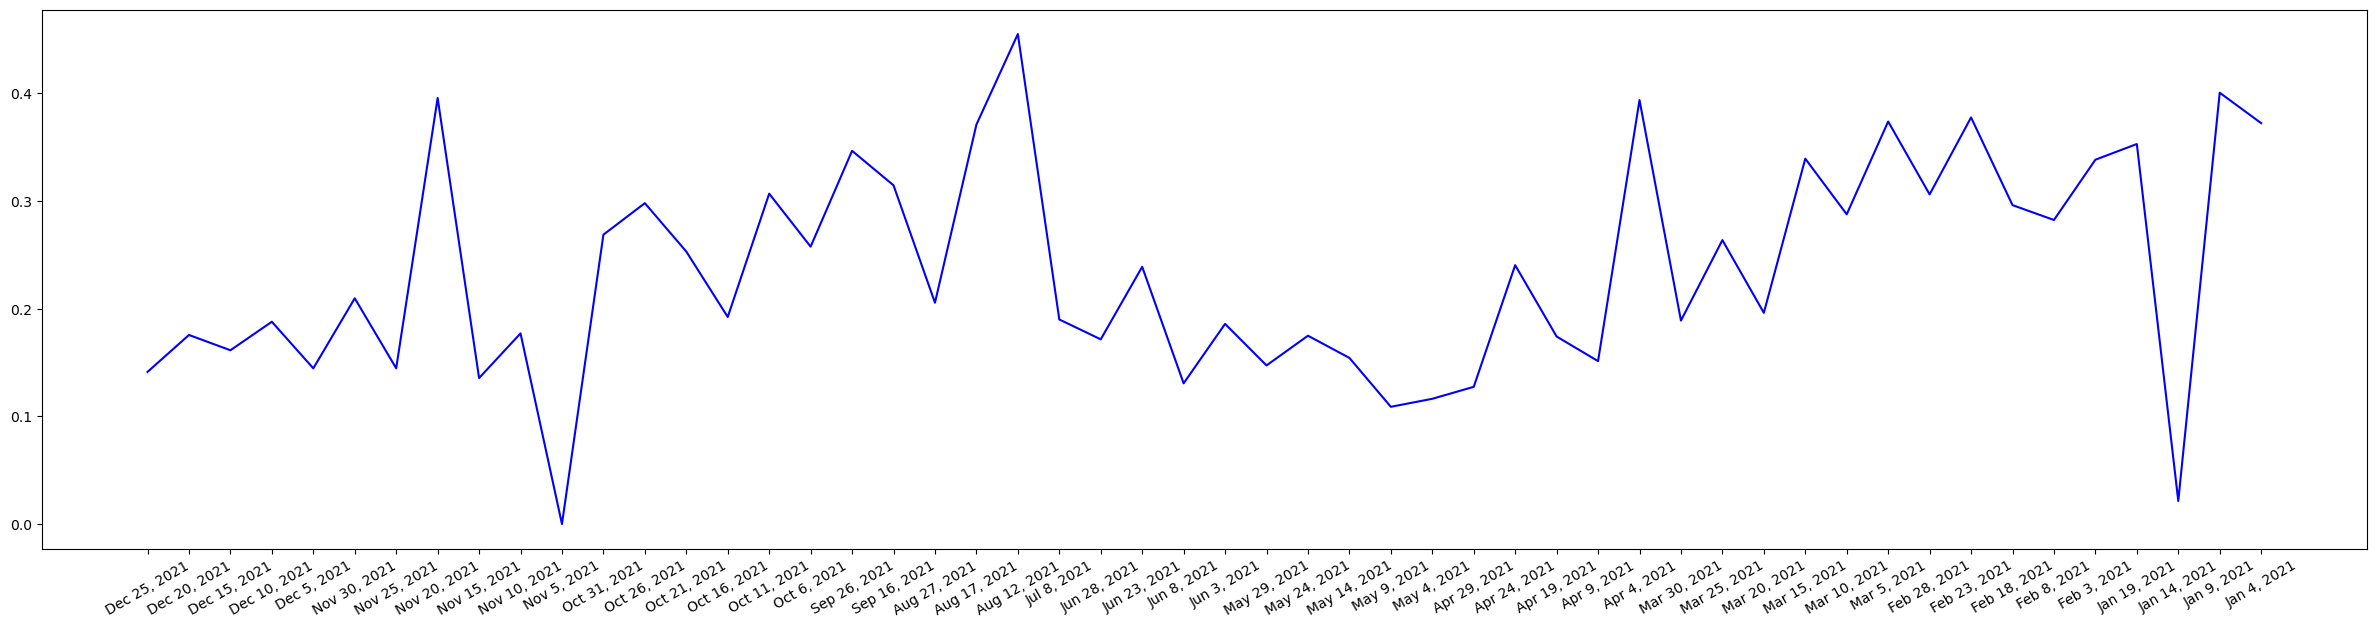

In [298]:
#loading of the data

data=pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv')

#values put into different array
x = data['date'].values   #date
y = data['NDVI_p3_reverse'].values   #NDVI values

plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.xticks(rotation =30)

array([[0.141279 ],
       [0.1755725],
       [0.161378 ],
       [0.187856 ],
       [0.144573 ],
       [0.209634 ],
       [0.14463  ],
       [0.395652 ],
       [0.135563 ],
       [0.177042 ],
       [0.       ],
       [0.268727 ],
       [0.297978 ],
       [0.253029 ],
       [0.192275 ],
       [0.306802 ],
       [0.257584 ],
       [0.346583 ],
       [0.314572 ],
       [0.205543 ],
       [0.370912 ],
       [0.455045 ],
       [0.189967 ],
       [0.17151  ],
       [0.23888  ],
       [0.130649 ],
       [0.185864 ],
       [0.147293 ],
       [0.174878 ],
       [0.154281 ],
       [0.108869 ],
       [0.1163   ],
       [0.12741  ],
       [0.240421 ],
       [0.174136 ],
       [0.151285 ],
       [0.393747 ],
       [0.18894  ],
       [0.263677 ],
       [0.19615  ],
       [0.339286 ],
       [0.287617 ],
       [0.37381  ],
       [0.306111 ],
       [0.377588 ],
       [0.296159 ],
       [0.282356 ],
       [0.338322 ],
       [0.352909 ],
       [0.0213904],


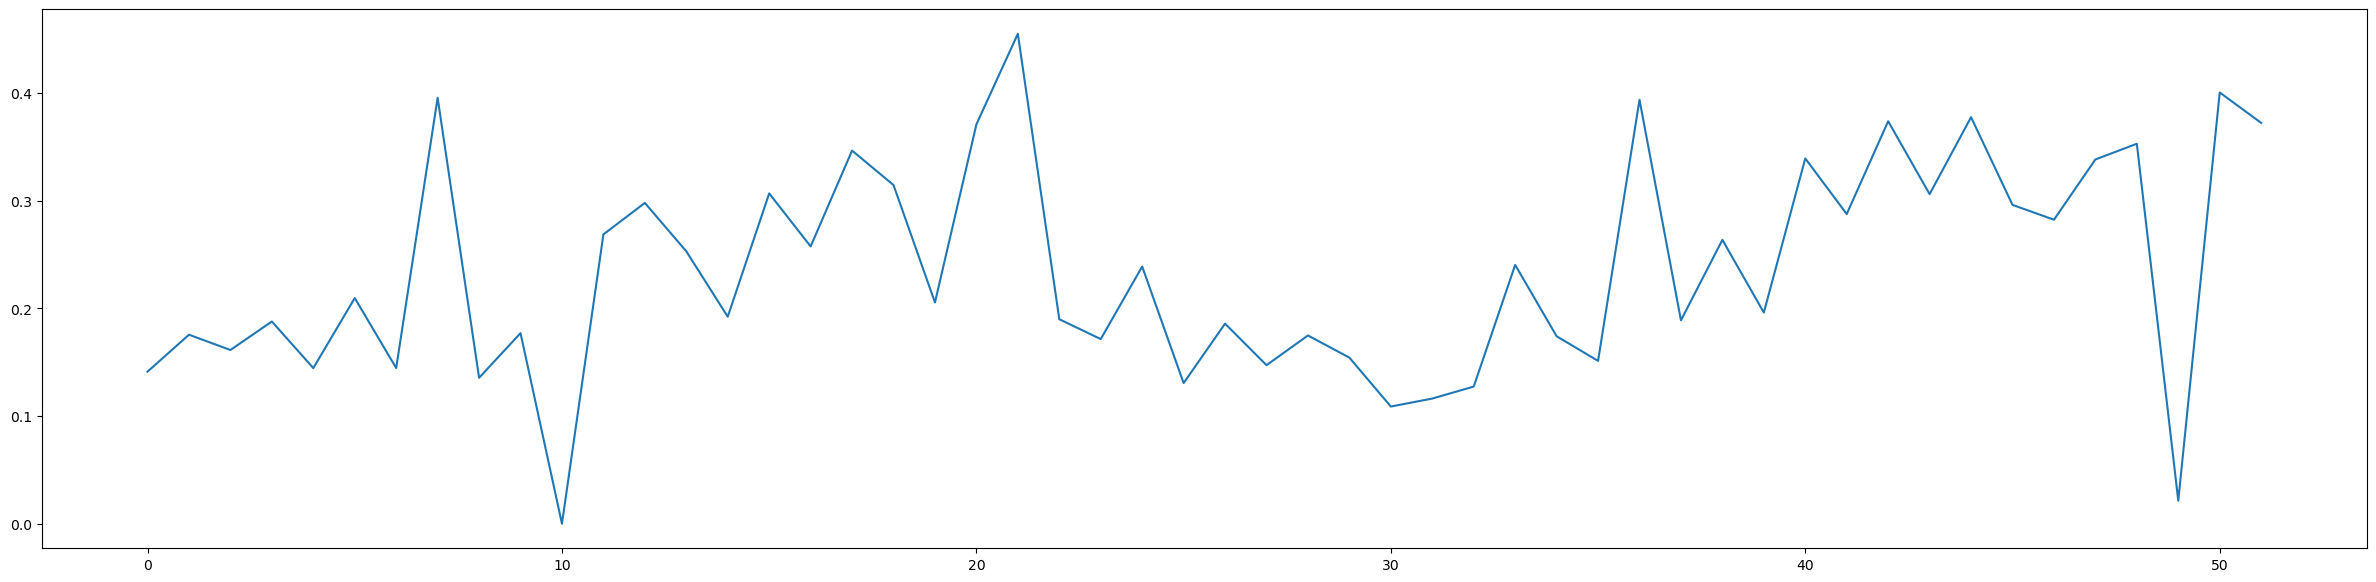

In [299]:
# load the dataset
dataframe = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv', usecols=[1])
plt.figure(figsize=(30,7))
plt.plot(dataframe)

#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

dataset

In [300]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset using pandas read_csv
data = pd.read_csv('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3_reverse.csv')

# Convert the NDVI data column to a NumPy array
ndvi_data = data['NDVI_p3_reverse'].values
ndvi_data = ndvi_data.reshape(-1, 1)

# Normalize the NDVI data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ndvi_data_normalized = scaler.fit_transform(ndvi_data)

# Print the normalized NDVI data
print(ndvi_data_normalized)

[[0.31047259]
 [0.38583547]
 [0.35464185]
 [0.4128295 ]
 [0.31771144]
 [0.4606885 ]
 [0.3178367 ]
 [0.86947884]
 [0.2979112 ]
 [0.38906482]
 [0.        ]
 [0.59055039]
 [0.65483194]
 [0.5560527 ]
 [0.42254063]
 [0.67422343]
 [0.5660627 ]
 [0.76164555]
 [0.69129866]
 [0.45169818]
 [0.81511059]
 [1.        ]
 [0.4174686 ]
 [0.37690778]
 [0.52495907]
 [0.28711226]
 [0.40845191]
 [0.32368887]
 [0.38430924]
 [0.33904559]
 [0.23924887]
 [0.25557912]
 [0.27999429]
 [0.52834555]
 [0.38267864]
 [0.33246162]
 [0.86529244]
 [0.41521168]
 [0.57945258]
 [0.43105627]
 [0.74560977]
 [0.63206276]
 [0.82147919]
 [0.6727049 ]
 [0.82978167]
 [0.65083453]
 [0.62050127]
 [0.7434913 ]
 [0.77554747]
 [0.04700722]
 [0.88021185]
 [0.81813667]]


In [301]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [302]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 0.3638
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3397
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.3163
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.2946
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2724
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2518
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2322
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2121
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1928
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1728
Epoch 11/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1553
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1363
Epoch 13/100
2/2 [==============================] - 0s 0s

In [303]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred_p15reverse  = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 18ms/step


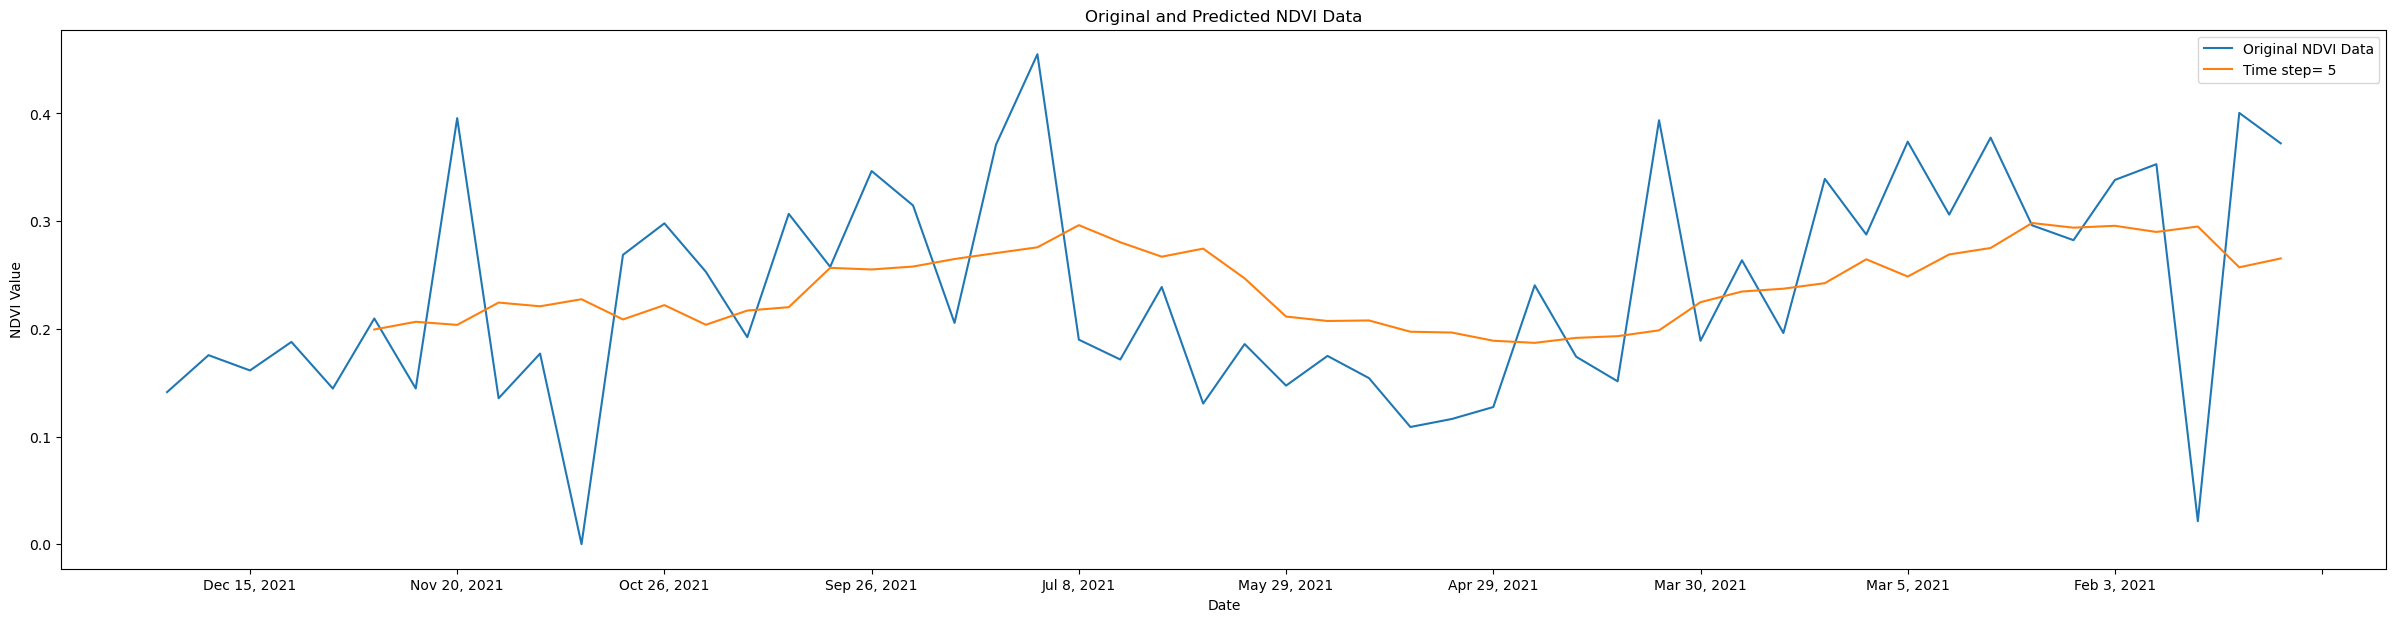

In [304]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 7))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
# Plot the original NDVI data
plt.plot(data['date'], data['NDVI_p3_reverse'], label='Original NDVI Data') 

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space,y_pred_p15reverse ]), label='Time step= 5')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()



## average 

In [305]:
a =np.concatenate([empty_space, y_pred_p15forward])
b= np.concatenate([empty_space,y_pred_p15reverse])
b = b[::-1]
# Calculate the average of curves 'a' and 'b'
average_curve5 = (a + b) / 2



In [306]:
reversed_time = data['date'][::-1]
reversed_average = average_curve5[::-1]  # Reverse the average curve as well

NameError: name 'reversed_time' is not defined

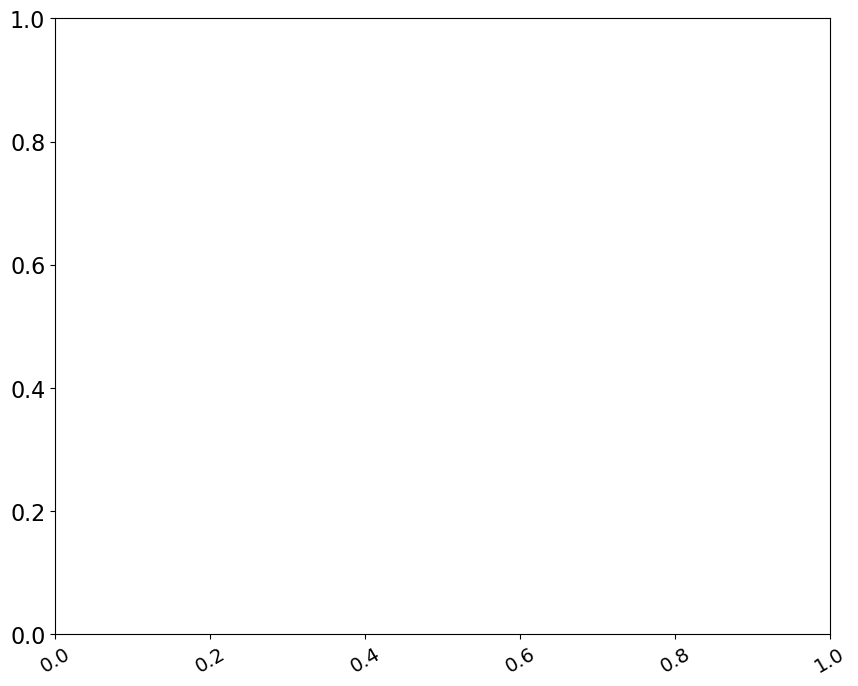

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)
# Plot the original NDVI data
plt.plot(reversed_time, data['NDVI_p3_reverse'][::-1],label='Original NDVI Data')


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days

# Plot the averaged curve over the original data
plt.plot(reversed_time, reversed_average, color='green',label='Averaged Curve ts=5')




# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('LSTM model fitted on NDVI timeseries curve of pixel-3 for timestep=5  ',fontsize=15)
plt.tight_layout()
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/pt3_average curve ts=5.png') 
# Show the plot
plt.show()

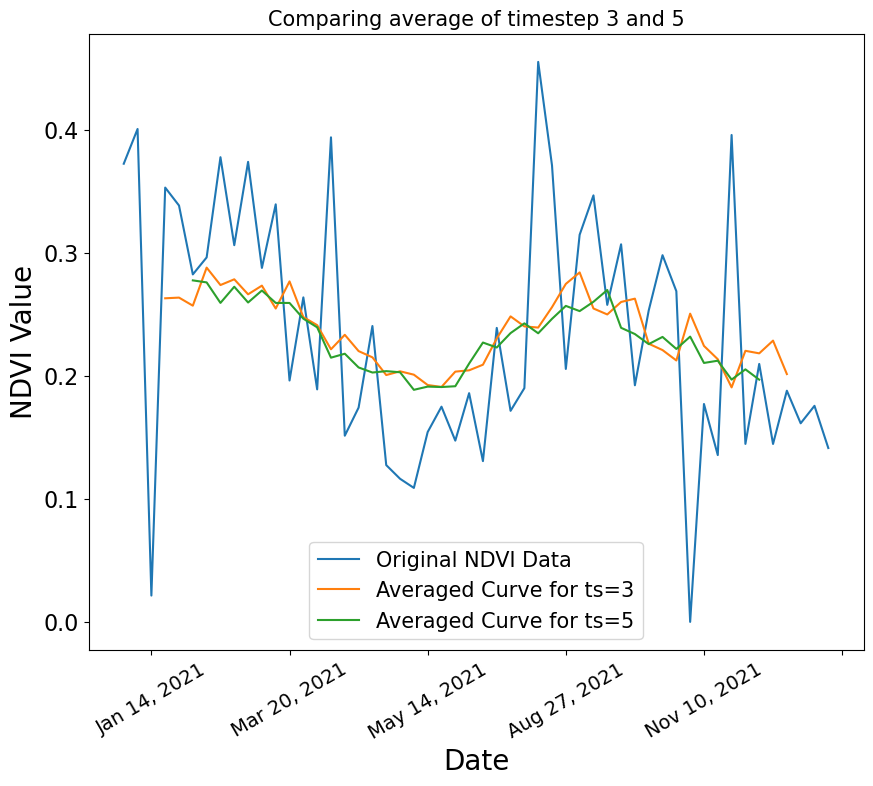

In [309]:
a_avg=average_curve = (a3 + b3) / 2
b_avg=average_curve5 = (a + b) / 2

plt.figure(figsize=(10, 8))
plt.xticks(rotation=30,fontsize=14)
plt.yticks(fontsize=16)



# Plot the averaged curve over the original data
plt.plot(reversed_time, data['NDVI_p3_reverse'][::-1],label='Original NDVI Data')

plt.plot(reversed_time, a_avg, label='Averaged Curve for ts=3')


plt.plot(reversed_time, b_avg, label='Averaged Curve for ts=5')


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
# Set plot labels and title
plt.xlabel('Date',fontsize=20)
plt.ylabel('NDVI Value',fontsize=20)
plt.title('Comparing average of timestep 3 and 5',fontsize=15)
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/lstm/pt3_average curve comparision ts=5and3.png') 
# Show the plot
plt.show()


## Time step=5



In [25]:
# Define the number of time steps to consider in each input sequence
n_steps = 5

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [19]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 2s 42ms/step - loss: 0.3276
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.3071
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.2862
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2669
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2485
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 0.2305
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2128
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.1955
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1786
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1626
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1468
Epoch 12/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1310
Epoch 13/100
2/2 [==============================] 

In [20]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 10ms/step


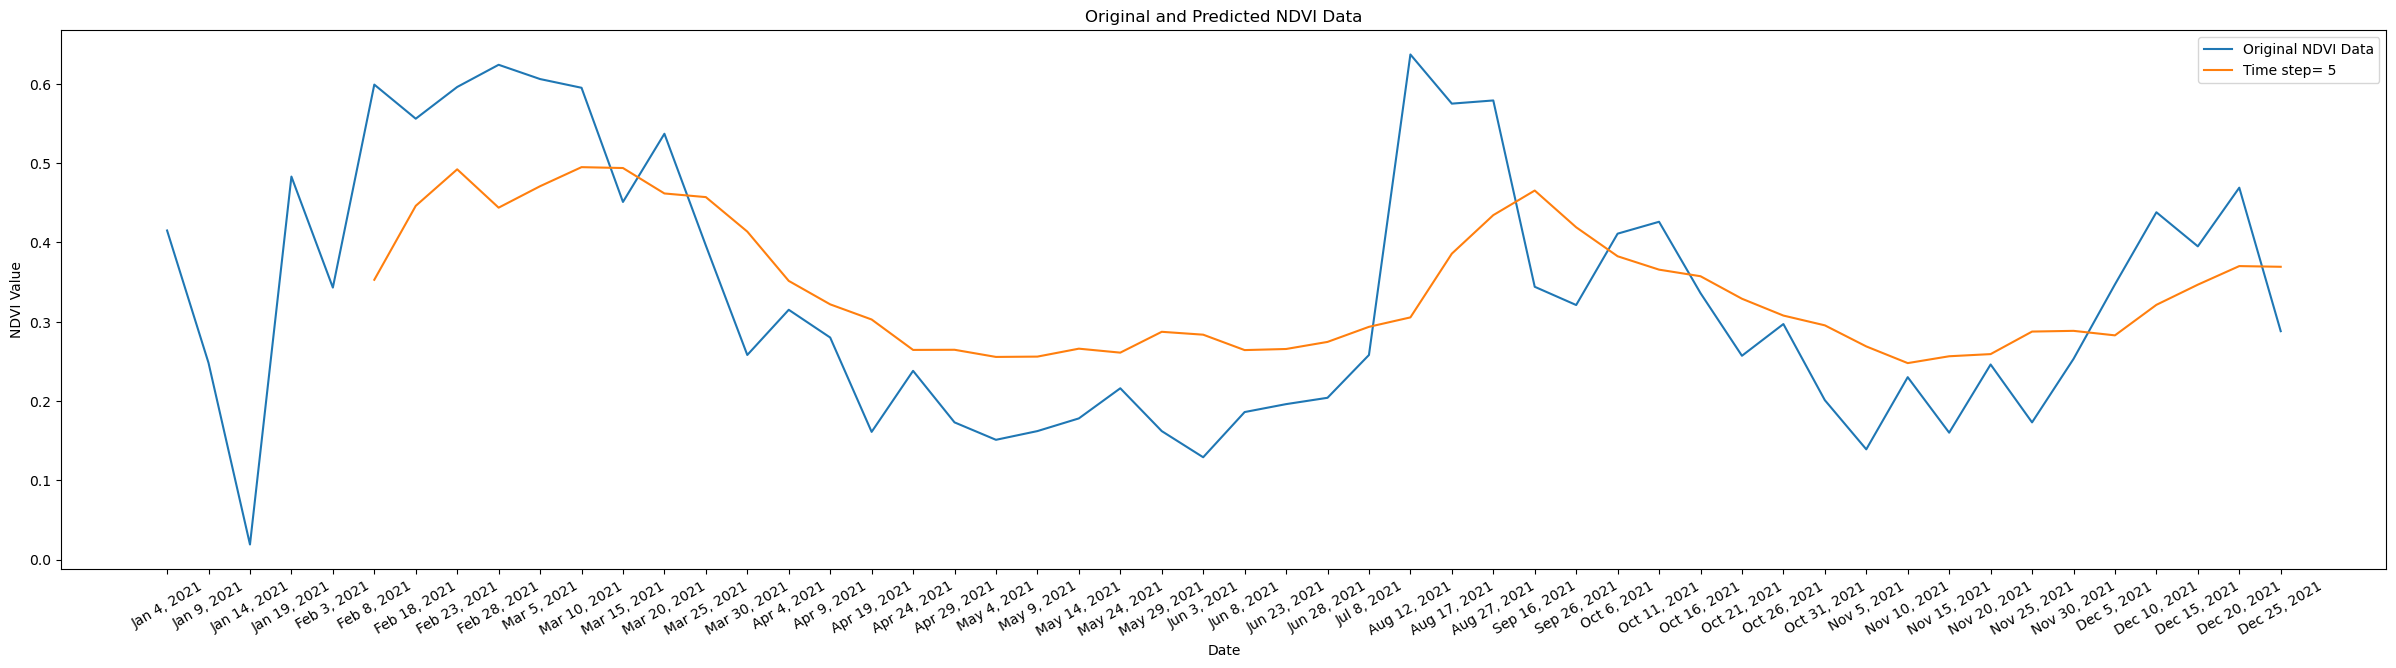

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.xticks(rotation =30)
# Plot the original NDVI data
plt.plot(data['system:time_start'], data['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred]), label='Time step= 5')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()


## Time step=10

In [23]:
# Define the number of time steps to consider in each input sequence
n_steps = 10

# Function to create sequences of data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences for training
X_train, y_train = create_sequences(ndvi_data_normalized, n_steps)


In [24]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 3s 33ms/step - loss: 0.2628
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2426
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2223
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2016
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1826
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 0.1635
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 0.1464
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.1285
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1139
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0992
Epoch 11/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0853
Epoch 12/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0723
Epoch 13/100
2/2 [==============================]

In [25]:
# Function to generate predictions from the LSTM model
def generate_predictions(model, data, n_steps):
    predictions = []
    for i in range(len(data) - n_steps):
        x_input = data[i:i+n_steps].reshape(1, n_steps, 1)
        y_pred = model.predict(x_input)
        predictions.append(y_pred[0, 0])
    return np.array(predictions)

# Generate predictions
X_pred = ndvi_data_normalized[:n_steps].reshape(1, n_steps, 1)
y_pred_normalized = generate_predictions(model, ndvi_data_normalized, n_steps)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred_normalized.reshape(-1, 1))


1/1 [==============================] - 0s 10ms/step


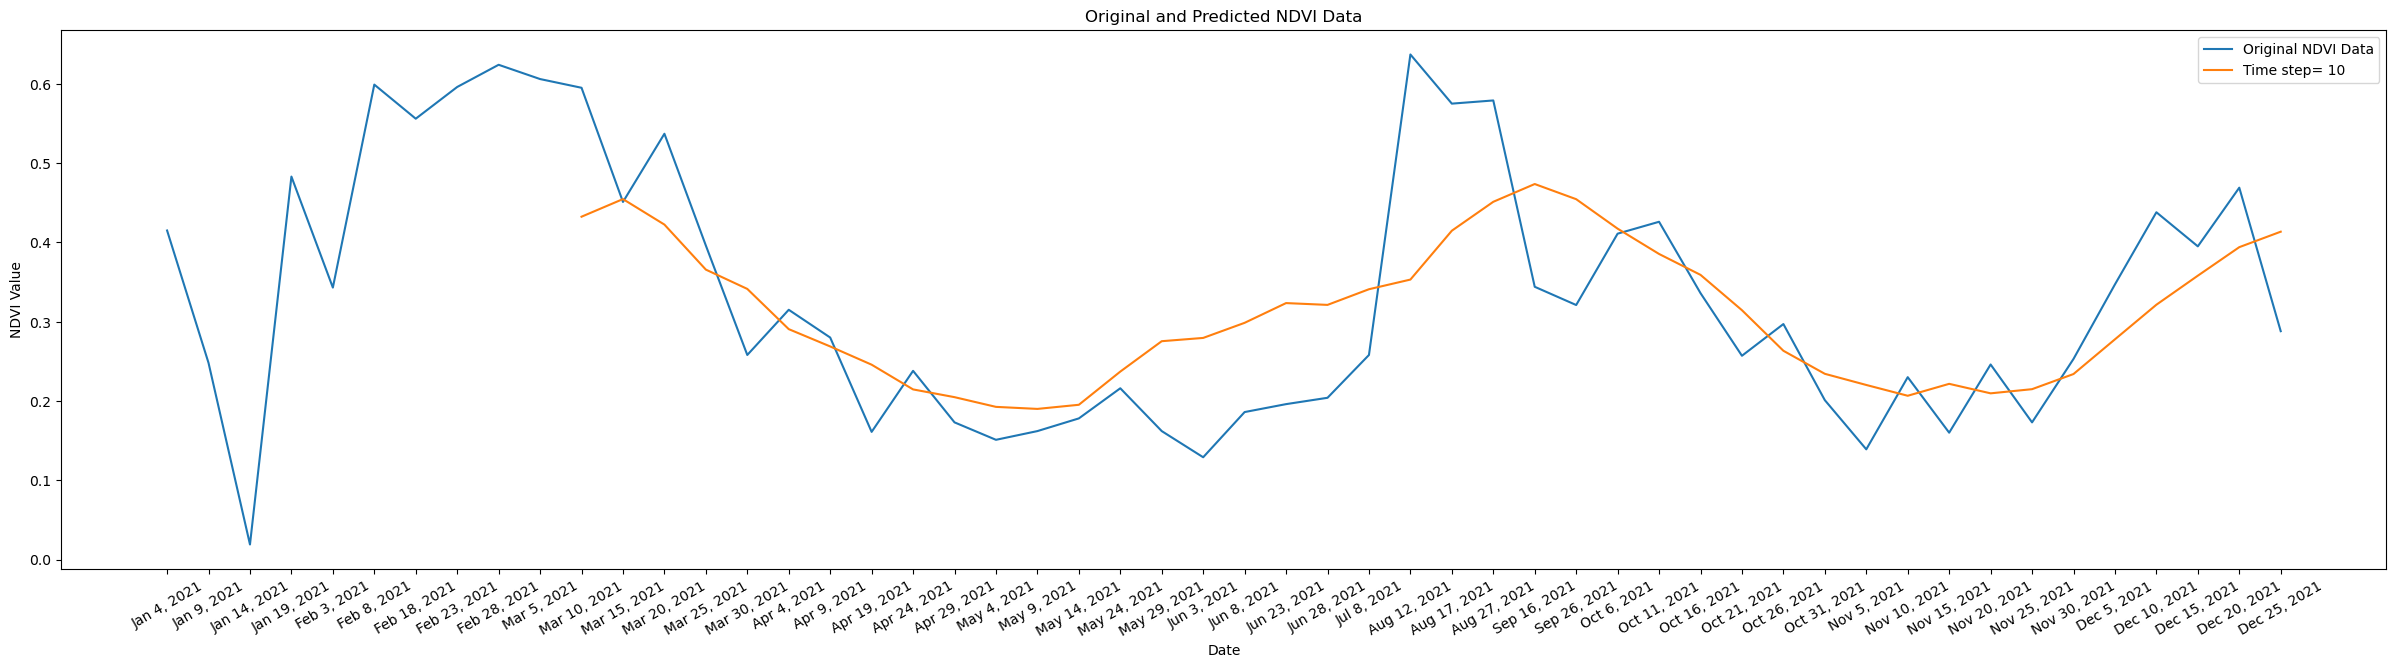

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.xticks(rotation =30)
# Plot the original NDVI data
plt.plot(data['system:time_start'], data['0'], label='Original NDVI Data')

# Plot the predicted values
# Since you have the predictions for the first 'n_steps' data points, you need to leave some empty space (NaN) in the plot for them
empty_space = np.empty((n_steps, 1))
empty_space[:, :] = np.nan
plt.plot(np.concatenate([empty_space, y_pred]), label='Time step= 10')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.title('Original and Predicted NDVI Data')
plt.legend()

# Show the plot
plt.show()